## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## IMPORT DATA

In [2]:
pd.read_csv("gender_submission.csv")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [3]:
pd.read_csv("test.csv")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(df.shape)

(891, 12)


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df["SurvivalLabel"] = df["Survived"].map({1: "Survived", 0: "Not Survived"})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivalLabel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Survived
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not Survived


## Good Visualization

In [8]:
counts = (
    df.groupby(["Pclass", "Sex", "SurvivalLabel"])
      .size()
      .unstack(fill_value=0)
)

counts

SurvivalLabel  Not Survived  Survived
Pclass Sex                           
1      female             3        91
       male              77        45
2      female             6        70
       male              91        17
3      female            72        72
       male             300        47

In [9]:
pct = counts.div(counts.sum(axis=1), axis=0) * 100
pct

SurvivalLabel  Not Survived   Survived
Pclass Sex                            
1      female      3.191489  96.808511
       male       63.114754  36.885246
2      female      7.894737  92.105263
       male       84.259259  15.740741
3      female     50.000000  50.000000
       male       86.455331  13.544669

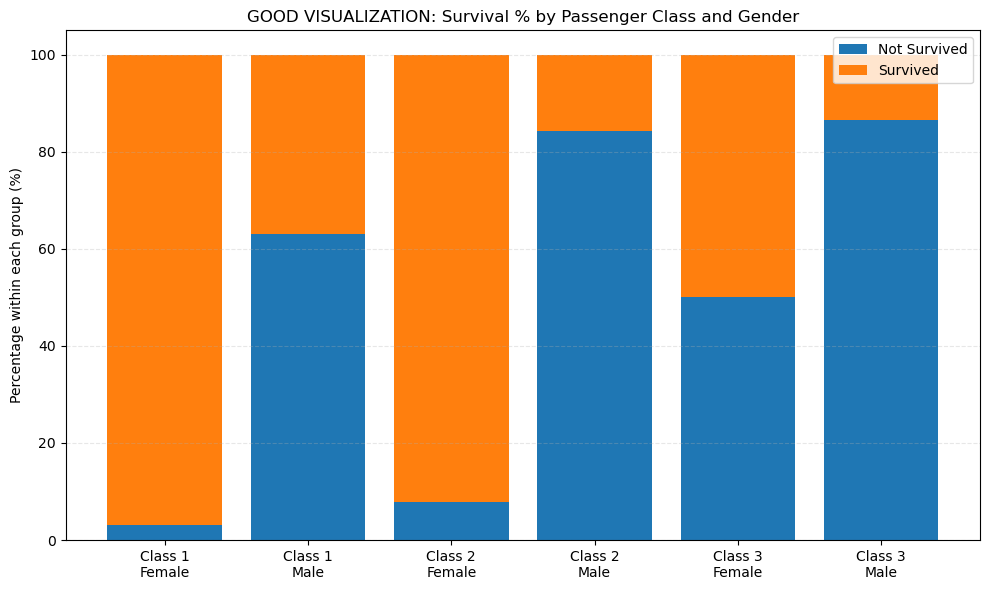

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(pct.index))
labels = [f"Class {pc}\n{sex.title()}" for pc, sex in pct.index]

bottom = np.zeros(len(pct))

for col in ["Not Survived", "Survived"]:
    ax.bar(x, pct[col].values, bottom=bottom, label=col)
    bottom += pct[col].values

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Percentage within each group (%)")
ax.set_title("GOOD VISUALIZATION: Survival % by Passenger Class and Gender")
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

Uses percentages

Shows interaction (Class + Gender)

Axis starts at 0

No manipulation

Clear comparison

## 2 BOX PLOT (AGE)

In [15]:
df_age = df.dropna(subset=["Age"])
df_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivalLabel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Survived
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not Survived


In [16]:
df_age["Group"] = df_age["Sex"].str.title() + " - " + df_age["SurvivalLabel"]
df_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivalLabel,Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Survived,Male - Not Survived
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,Female - Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Female - Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,Female - Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not Survived,Male - Not Survived


<Figure size 1000x600 with 0 Axes>

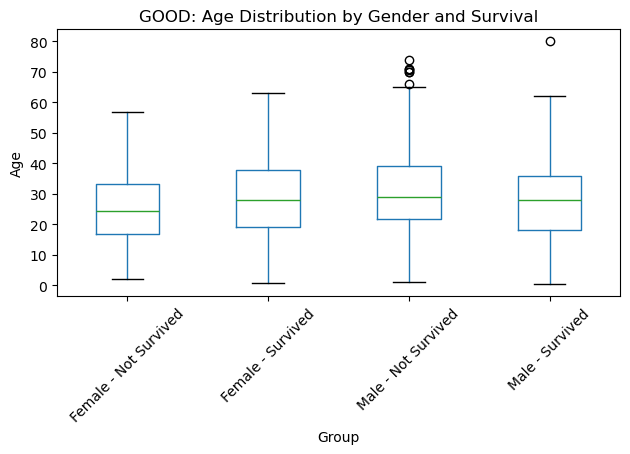

In [18]:
plt.figure(figsize=(10,6))

df_age.boxplot(
    column="Age",
    by="Group",
    grid=False
)

plt.title("GOOD: Age Distribution by Gender and Survival")
plt.suptitle("")
plt.xlabel("Group")
plt.ylabel("Age")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-This plot shows median age differences between survivors and non-survivors

-It shows spread and variation

-It reveals which age survived more

-It highlights outliers clearly

## BAD VISUALIZATION

In [12]:
survivors = df[df["Survived"] == 1]
survivor_counts = survivors["Pclass"].value_counts().sort_index()
survivor_counts

Pclass
1    136
2     87
3    119
Name: count, dtype: int64

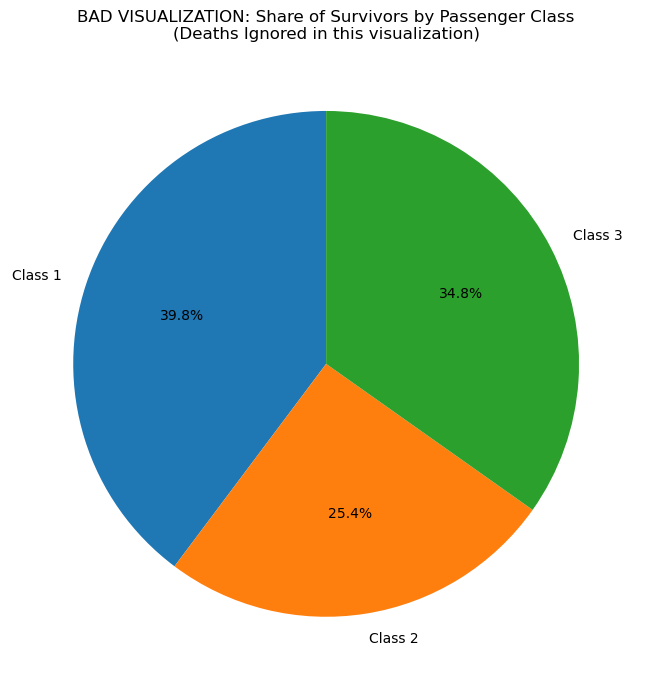

In [14]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(
    survivor_counts.values,
    labels=[f"Class {i}" for i in survivor_counts.index],
    autopct="%1.1f%%",
    startangle=90
)

ax.set_title("BAD VISUALIZATION: Share of Survivors by Passenger Class\n(Deaths Ignored in this visualization)")

plt.tight_layout()
plt.show()

-Ignores total passengers

-Hides survival rate

-Shows only survivors

-Viewer may think Class 3 survived well

-But actually survival rate in Class 3 was low.

## 2 

In [20]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [21]:
fare_avg = df.groupby("Survived")["Fare"].mean()
fare_avg

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

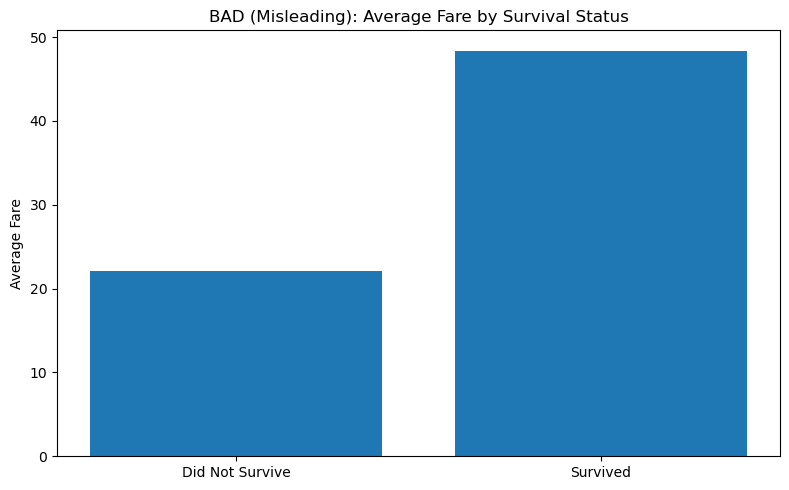

In [22]:
plt.figure(figsize=(8,5))

plt.bar(
    ["Did Not Survive", "Survived"],
    fare_avg.values
)

plt.title("BAD: Average Fare by Survival Status")
plt.ylabel("Average Fare")

plt.tight_layout()
plt.show()

-Uses mean instead of median

-Extreme rich passengers inflate average

-Makes it look like survival strongly depended on fare

-Does not show distribution